RELU es la funcion de activación que más se utiliza.
En clasificacion binaria se utiliza sigmoide que es entre 0 y 1.
En multiclase se tienen el mismo número de salidas que el numero de clases.
La libreria que se utilizara es pythorch.
La funcion de optimizacion "Stocastic descent gradient" se utiliza mucho.
BCELoss en binaria funcion de perdida.

In [1]:
import pandas as pd
import numpy as np
import torch

dataframe = pd.read_csv('housing.csv')
print(dataframe.shape)
dataframe.head()

from sklearn.model_selection import train_test_split

dataset_train, dataset_test = train_test_split(dataframe.values,
                                               test_size=0.2,
                                              random_state=42)

print(dataset_train.shape)
print(dataset_test.shape)

X_train = dataset_train[:,0:8]
y_train = dataset_train[:,8]
X_test = dataset_test[:,0:8]
y_test = dataset_test[:,8]

(20640, 9)
(16512, 9)
(4128, 9)


In [46]:
from torch import nn
from torch.utils.data import Dataset, DataLoader

# Datatset class
class MyDatasett(Dataset):
  def __init__(self, X, y):
    self.X = torch.tensor(X, dtype=torch.float32)
    self.y = torch.tensor(y, dtype=torch.float32)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx,:], self.y[idx]

# Datasets
train_dataset = MyDatasett(X_train, y_train)
test_dataset = MyDatasett(X_test, y_test)
print(train_dataset)

In [47]:
# Dataloaders
batch_size = 5
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
train2_dataloader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=False)
test_dataloader = DataLoader(train_dataset, batch_size=len(test_dataset), shuffle=False)

# Definir la red
class Net(torch.nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.hidden1 = nn.Linear(input_size, 4)
        self.relu1 = nn.ReLU()
        self.output = nn.Linear(4, 1)

    def forward(self, x):
        x = self.relu1(self.hidden1(x))
        x = self.output(x)
        return x

# Crear un modelo
input_size = X_train.shape[1]
net = Net(input_size)


In [48]:
# Definir la función de pérdida y el optimizador
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [49]:
# Entrenamiento del modelo
epochs = 100

# Listas para almacenar las pérdidas y precisión en entrenamiento y validación
train_losses = []
val_losses = []
loss_tr = []

for epoch in range(epochs):
    net.train()
    for batch_X, batch_y in train_dataloader:
        optimizer.zero_grad()
        output = net(batch_X)
        loss = loss_func(output, batch_y.view(-1, 1))
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')
        
    # Evaluación en conjunto de entrenamiento
    net.eval()
    with torch.no_grad(): # Se emplea cuando no se tiene intencion de realizar ajustes de parametros.
        train_outputs = net(train_dataset.X)
        train_loss = loss_func(train_outputs, train_dataset.y.view(-1, 1)) # error cuadratico medio

    # Evaluación en conjunto de validación
        val_outputs = net(test_dataset.X)
        val_loss = loss_func(val_outputs, test_dataset.y.view(-1, 1))

    # Almacenar pérdidas y precisión en listas
    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())
    loss_tr.append(loss.item())

Epoch [10/100], Loss: 0.4111815094947815
Epoch [20/100], Loss: 0.30358511209487915
Epoch [30/100], Loss: 0.07777553796768188
Epoch [40/100], Loss: 0.04785706475377083
Epoch [50/100], Loss: 0.03330615535378456
Epoch [60/100], Loss: 0.035134829580783844
Epoch [70/100], Loss: 0.0453074648976326
Epoch [80/100], Loss: 0.05334854498505592
Epoch [90/100], Loss: 0.10518106818199158
Epoch [100/100], Loss: 0.12253405153751373


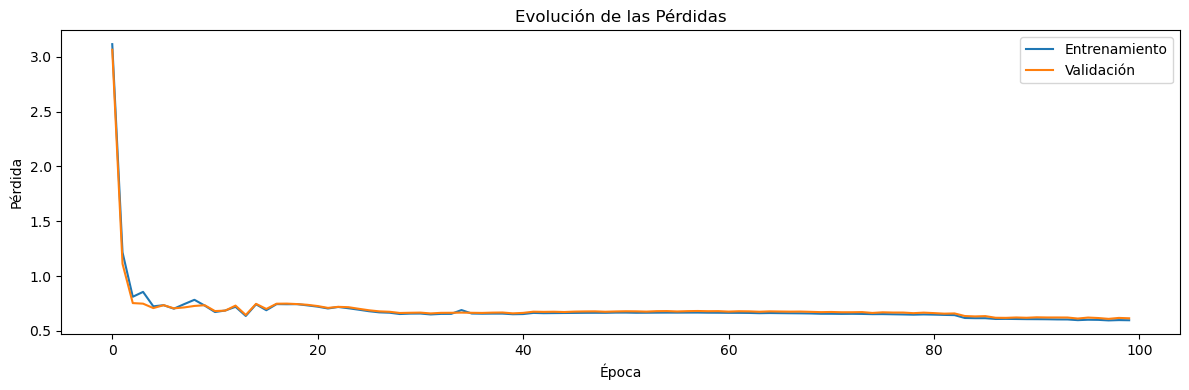

In [52]:
import matplotlib.pyplot as plt

# Graficar la evolución de pérdidas y precisión
plt.figure(figsize=(12, 4))

plt.plot(train_losses, label='Entrenamiento')
plt.plot(val_losses, label='Validación')
plt.title('Evolución de las Pérdidas')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()